<a href="https://colab.research.google.com/github/bkuriach/language-grounding/blob/main/Attributes%20Predictions/MobileNet_visual_attribute_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from skimage import io
from PIL import Image
from tensorflow.keras import layers
import tensorflow_hub as hub
import tarfile

In [2]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6
!wget -P /tmp http://vision.cs.uiuc.edu/attributes/attribute_data.tar.gz
!wget -P /tmp http://vision.cs.uiuc.edu/attributes/ayahoo_test_images.tar.gz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 30 not upgraded.
Need to get 420 MB of archives.
After this operation, 3,369 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 10s (43.6 MB/s)
(Reading database ... 155685 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155663 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.4.1.50-1+cuda11.6_amd64.deb ...
Unpacking libcudnn8 (8.4.1.50-1+

In [3]:
# Gettig tar files
my_tar = tarfile.open('/tmp/attribute_data.tar.gz')
my_tar.extractall('/tmp') # specify which folder to extract to
my_tar.close()

my_tar = tarfile.open('/tmp/ayahoo_test_images.tar.gz')
my_tar.extractall('/tmp') # specify which folder to extract to
my_tar.close()

# Reading txt files
with open('/tmp/attribute_data/ayahoo_test.txt') as f:
    contents = f.read()
    print(contents)

donkey_1.jpg donkey 14 21 54 72 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
donkey_1.jpg donkey 51 12 83 71 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
donkey_100.jpg donkey 14 98 125 214 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
donkey_102.jpg donkey 332 29 614 438 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
donkey_111.jpg donkey 23 52 295 244 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
donkey_113.jpg donkey 32 158 159 286 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
donkey_114.jpg donkey 

In [4]:
import pandas as pd
import os
data = pd.read_csv('/tmp/attribute_data/ayahoo_test.txt', sep=' ')
data.columns = ['Image_name', 'Image_class', 'Bbox_xmin', 'Bbox_ymin', 'Bbox_xmax', 'Bbox_ymax', '2D Boxy', '3D Boxy', 'Round', 'Vert Cyl', 'Horiz Cyl', 'Occluded', 'Tail', 'Beak', 'Head', 'Ear', 'Snout', 'Nose', 'Mouth', 'Hair', 'Face', 'Eye', 'Torso', 'Hand', 'Arm', 'Leg', 'Foot/Shoe', 'Wing', 'Propeller', 'Jet engine', 'Window', 'Row Wind', 'Wheel', 'Door','Headlight', 'Taillight', 'Side mirror', 'Exhaust', 'Pedal', 'Handlebars', 'Engine', 'Sail', 'Mast', 'Text', 'Label', 'Furn. Leg', 'Furn. Back ', 'Furn. Seat', 'Furn. Arm', 'Horn', 'Rein', 'Saddle', 'Leaf', 'Flower', 'Stem/Trunk', 'Pot', 'Screen', 'Skin', 'Metal', 'Plastic', 'Wood', 'Cloth', 'Furry', 'Glass', 'Feather', 'Wool', 'Clear', 'Shiny', 'Vegetation', 'Leather']
ayahoo_test_images_list = os.listdir('/tmp/ayahoo_test_images')

In [5]:
import os
from tqdm import tqdm
print(len(ayahoo_test_images_list))
print(len(set(ayahoo_test_images_list)))
# All unique images in directory
# print(len(data['Image_name']))
# One image may have multiple bounding boxes

tmp_path = '/tmp/ayahoo_test_images'

image_path = '/content/ayahoo_test_images'

os.mkdir(image_path)

img = Image.open(os.path.join(tmp_path, 'donkey_1.jpg'))

for idx, rows in tqdm(data.iterrows()):
    img_name = rows[0]
    pil_image = Image.open(os.path.join(tmp_path, img_name))
    pil_image.save(os.path.join(image_path, img_name))

data.head()



2237
2237


2643it [00:39, 67.43it/s]


,Image_name,Image_class,Bbox_xmin,Bbox_ymin,Bbox_xmax,Bbox_ymax,2D Boxy,3D Boxy,Round,Vert Cyl,...,Wood,Cloth,Furry,Glass,Feather,Wool,Clear,Shiny,Vegetation,Leather
0,donkey_1.jpg,donkey,51,12,83,71,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,donkey_100.jpg,donkey,14,98,125,214,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,donkey_102.jpg,donkey,332,29,614,438,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,donkey_111.jpg,donkey,23,52,295,244,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,donkey_113.jpg,donkey,32,158,159,286,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
# Removing corrupted images
import os
corrupted_images = []
num_skipped = 0
folder_path = '/tmp/ayahoo_test_images'
for fname in os.listdir(folder_path):
    fpath = os.path.join(folder_path, fname)
    try:
        fobj = open(fpath, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
    finally:
        fobj.close()

    if not is_jfif:
        num_skipped += 1
        # Delete corrupted image
        corrupted_images.append(fpath.split('/')[-1])
        # os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 67 images


In [ ]:
corrupted_images

In [ ]:
len(corrupted_images)

67

In [ ]:
# # Modify data by removing rows with corrupted images
# data = data[~data['Image_name'].isin(corrupted_images)]

In [ ]:
for i in corrupted_images:
    if i in list(data['Image_name']):
        print("found")

In [8]:
data_model = data.loc[:,['Image_name', '2D Boxy', '3D Boxy', 'Round', 'Vert Cyl', 'Horiz Cyl', 'Occluded', 'Tail', 'Beak', 'Head', 'Ear', 'Snout', 'Nose', 'Mouth', 'Hair', 'Face', 'Eye', 'Torso', 'Hand', 'Arm', 'Leg', 'Foot/Shoe', 'Wing', 'Propeller', 'Jet engine', 'Window', 'Row Wind', 'Wheel', 'Door','Headlight', 'Taillight', 'Side mirror', 'Exhaust', 'Pedal', 'Handlebars', 'Engine', 'Sail', 'Mast', 'Text', 'Label', 'Furn. Leg', 'Furn. Back ', 'Furn. Seat', 'Furn. Arm', 'Horn', 'Rein', 'Saddle', 'Leaf', 'Flower', 'Stem/Trunk', 'Pot', 'Screen', 'Skin', 'Metal', 'Plastic', 'Wood', 'Cloth', 'Furry', 'Glass', 'Feather', 'Wool', 'Clear', 'Shiny', 'Vegetation', 'Leather']]
from sklearn.model_selection import train_test_split
X_train, X_val_temp, y_train, y_val_temp = train_test_split(data_model['Image_name'], data_model.iloc[:,1:], test_size=0.2, random_state=44)
X_val, X_test, y_val, y_test = train_test_split(X_val_temp, y_val_temp, test_size=0.2, random_state=44)
print("Number of posters for training: ", X_train.shape)
print("Number of posters for validation: ", X_val.shape)
print("Number of posters for testing: ", X_test.shape)
print("Number of posters for training: ", y_train.shape)
print("Number of posters for validation: ", y_val.shape)
print("Number of posters for testing: ", y_test.shape)


Number of posters for training:  (2114,)
Number of posters for validation:  (423,)
Number of posters for testing:  (106,)
Number of posters for training:  (2114, 64)
Number of posters for validation:  (423, 64)
Number of posters for testing:  (106, 64)


In [9]:
image_path = '/content/ayahoo_test_images/'

X_train = [image_path +image_name for image_name in X_train]
X_val = [image_path + image_name for image_name in X_val]
X_test = [image_path+image_name for image_name in X_test]
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2114, 64)
(423, 64)
(106, 64)


In [ ]:
# Print example of movie posters and their binary targets
for i in range(3):
    print(X_train[i], y_train[i])

y_train.shape[1]

/content/ayahoo_test_images/goat_161.jpg [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
/content/ayahoo_test_images/wolf_893.jpg [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
/content/ayahoo_test_images/donkey_733.jpg [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


64

In [10]:
# Select image size and channels based ob the input that the tensorflow hub model receives
IMG_SIZE = 224
CHANNELS = 3
N_LABELS = y_train.shape[1]

def parse_function(filename, label):
    """Function that returns a tuple of normalized image array and labels array.
    Args:
        filename: string representing path to image
        label: 0/1 one-dimensional array of size N_LABELS
    """
    # Read an image from a file
    image_string = tf.io.read_file(filename)
    # Decode it into a dense vector
    image_decoded = tf.image.decode_jpeg(image_string, channels=CHANNELS)
    # Resize it to fixed shape
    image_resized = tf.image.resize(image_decoded, [IMG_SIZE, IMG_SIZE])
    # Normalize it from [0, 255] to [0.0, 1.0]
    image_normalized = image_resized / 255.0
    return image_normalized, label

In [11]:
BATCH_SIZE = 64 # Big enough to measure an F1-score
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically
SHUFFLE_BUFFER_SIZE = 256 # Shuffle the training data by a chunck of 1024 observations

In [12]:
def create_dataset(filenames, labels, is_training=True):
    """Load and parse dataset.
    Args:
        filenames: list of image paths
        labels: numpy array of shape (BATCH_SIZE, N_LABELS)
        is_training: boolean to indicate training mode
    """
    
    # Create a first dataset of file paths and labels
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    # Parse and preprocess observations in parallel
    dataset = dataset.map(parse_function, num_parallel_calls=AUTOTUNE)
    
    if is_training == True:
        # This is a small dataset, only load it once, and keep it in memory.
        dataset = dataset.cache()
        # Shuffle the data each buffer size
        dataset = dataset.shuffle(buffer_size=SHUFFLE_BUFFER_SIZE)
        
    # Batch the data for multiple steps
    dataset = dataset.batch(BATCH_SIZE)
    # Fetch batches in the background while the model is training.
    dataset = dataset.prefetch(buffer_size=AUTOTUNE)
    
    return dataset

train_ds = create_dataset(X_train, y_train)
val_ds = create_dataset(X_val, y_val)
test_ds = create_dataset(X_test, y_test)

In [ ]:
for f, l in train_ds.take(10):
    print("Shape of features array:", f.numpy().shape)
    print("Shape of labels array:", l.numpy().shape)

Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)
Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)
Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)
Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)
Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)
Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)
Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)
Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)
Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)
Shape of features array: (64, 224, 224, 3)
Shape of labels array: (64, 64)


In [11]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_SIZE,IMG_SIZE,CHANNELS))
feature_extractor_layer.trainable = False
#pre_trained_model = tf.keras.applications.resnet.ResNet50(include_top = True)
model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(1024, activation='relu', name='hidden_layer'),
    # Apply sigmoid as we are doing multi-label classification
    layers.Dense(N_LABELS, activation='sigmoid', name='output')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 hidden_layer (Dense)        (None, 1024)              1311744   
                                                                 
 output (Dense)              (None, 64)                65600     
                                                                 
Total params: 3,635,328
Trainable params: 1,377,344
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
for batch in train_ds:
    print(model.predict(batch[:1]))
    break

[[0.3261593  0.38638815 0.68545866 ... 0.6317401  0.48159647 0.749279  ]
 [0.3448456  0.58555543 0.67849016 ... 0.5896031  0.2213346  0.6713786 ]
 [0.6288098  0.38499635 0.66455925 ... 0.4100612  0.25867262 0.6330687 ]
 ...
 [0.45817578 0.51258945 0.4421479  ... 0.565247   0.41526887 0.5057693 ]
 [0.46351555 0.56384385 0.3757145  ... 0.5053515  0.31454083 0.69902086]
 [0.42873597 0.7199734  0.76029295 ... 0.55216    0.1327605  0.72109216]]


In [12]:
LR = 0.01 # Keep it small when transfer learning
EPOCHS = 30
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
  loss='binary_crossentropy',
  metrics='accuracy')

In [ ]:
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=create_dataset(X_val, y_val))

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

saved_path = '/content/gdrive/MyDrive/Colab Notebooks/VnL/mobilenet'
# model.save(saved_path)



Mounted at /content/gdrive


In [14]:
from tensorflow import keras
my_model = keras.models.load_model(saved_path)

In [15]:
import pandas as pd
from tensorflow.keras.utils import load_img, img_to_array

noun_phrases_images = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/VnL/images.csv')

noun_phrase_to_image_mapping = {} # add multiple images for each np 
for id, rows in noun_phrases_images.iterrows():
    nps = rows[1]
    img_link = rows[2]  
    if nps in noun_phrase_to_image_mapping.keys():
        noun_phrase_to_image_mapping[nps].append(img_link)
    else:
        noun_phrase_to_image_mapping[nps] = [img_link]





In [16]:
from io import BytesIO
import urllib
import os 

test_images_path = '/content/test_images'
try:
  os.mkdir(test_images_path)
except:
  pass




for nps, image_list in noun_phrase_to_image_mapping.items():
    nps = nps.replace(' ', '_')
    np_image_path = os.path.join(test_images_path, nps)
    try:
      os.mkdir(np_image_path)
    except:
      pass
    
    ## save images in corresponding np directory
    for link in image_list:
      urllib.request.urlretrieve(link, os.path.join(np_image_path, link.split('/')[-1]))
    


# urllib.request.urlretrieve(l, "local-filename.jpg")

# x = create_dataset(["local-filename.jpg"], None)
# proba = my_model.predict(x)

# threshold = 0.5
# proba = np.array([[0 if a_ < threshold else 1 for a_ in a] for a in proba])

# proba

In [40]:
column_names_64 = ['2D Boxy', '3D Boxy', 'Round', 'Vert Cyl', 'Horiz Cyl', 'Occluded', 'Tail', 
                'Beak', 'Head', 'Ear', 'Snout', 'Nose', 'Mouth', 'Hair', 'Face', 'Eye', 'Torso', 'Hand', 'Arm', 'Leg', 
                'Foot/Shoe', 'Wing', 'Propeller', 'Jet engine', 'Window', 'Row Wind', 'Wheel', 'Door','Headlight', 'Taillight', 
                'Side mirror', 'Exhaust', 'Pedal', 'Handlebars', 'Engine', 'Sail', 'Mast', 'Text', 'Label', 'Furn. Leg', 'Furn. Back ', 
                'Furn. Seat', 'Furn. Arm', 'Horn', 'Rein', 'Saddle', 'Leaf', 'Flower', 'Stem/Trunk', 'Pot', 'Screen', 'Skin', 'Metal', 
                'Plastic', 'Wood', 'Cloth', 'Furry', 'Glass', 'Feather', 'Wool', 'Clear', 'Shiny', 'Vegetation', 'Leather']


column_names_64 = [x.strip() for x in column_names_64]

In [100]:
from tqdm import tqdm
import numpy as np
def most_freq(lst):
    return max(set(lst), key=lst.count)

df_dict = {}
df_dict['noun_phrase'] = []
final_attr_labels = {}
i = 0
threshold =0
for nps, links in tqdm(noun_phrase_to_image_mapping.items()):
    df_dict['noun_phrase'].append(nps)

    nps_path = nps.replace(' ', '_') ## Removing space to search filepath
    filenames = os.listdir(os.path.join(test_images_path, nps_path))
    filenames = [os.path.join(test_images_path, nps_path, img) for img in filenames]
    X_pred = create_dataset(filenames, None)
    proba = my_model.predict(X_pred)
    proba = np.array([[0 if a_ < threshold else a_ for a_ in a] for a in proba])
    predictions = proba.sum(axis=0)
    # predictions = np.array([1 if a_ > 2 else 0 for a_ in predictions])

    for category in column_names_64:
        if category in final_attr_labels.keys():
            final_attr_labels[category].append(predictions[list(column_names_64).index(category)])
        else:
            final_attr_labels[category] = [predictions[list(column_names_64).index(category)]]

100%|██████████| 174/174 [00:37<00:00,  4.66it/s]


In [101]:
for lab in column_names_64:
    df_dict[lab] = final_attr_labels[lab]

df = pd.DataFrame(df_dict)




## Renaming column names
with open('/content/gdrive/MyDrive/Colab Notebooks/VnL/attribute_names.txt', 'r') as content: ## This is the 33 attribute names present in the affordanceKB paper
    lab = content.read()

top_33_attr = [line for line in lab.split('\n') if len(line) > 0]

df = df.rename(columns={'2D Boxy': 'Boxy_2D', '3D Boxy': 'Boxy_3D', 
                               'Vert Cyl': 'Vert_Cyl',
                               'Horiz Cyl':'Horiz_Cyl', 'Furn. Leg': 'Furn_Leg',
                               'Furn. Back': 'Furn_Back',
                               'Furn. Seat': 'Furn_Seat', 'Furn. Arm': 'Furn_Arm'})

df = df[['noun_phrase'] + top_33_attr]
df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/VnL/visual_attributes_predictions.csv')

df.head()

,noun_phrase,Boxy_2D,Boxy_3D,Round,Vert_Cyl,Horiz_Cyl,Tail,Head,Wheel,Pedal,...,Wood,Cloth,Furry,Glass,Feather,Wool,Clear,Shiny,Vegetation,Leather
0,Product and geography,0.169733,0.740316,0.269220,0.440513,0.087739,0.834884,1.805080,0.118977,0.001879,...,0.322887,0.194238,1.543484,0.402285,0.001759,0.021748,0.056265,0.761322,0.001995,0.142285
1,cream,0.129131,1.304125,0.250254,0.411726,0.169940,0.416959,0.902530,0.113682,0.000940,...,0.327426,0.175032,0.750665,0.318485,0.000880,0.012896,0.049845,1.396191,0.000998,0.154114
2,work,0.172248,0.735207,0.269997,0.441673,0.087298,0.740718,1.710006,0.119182,0.001014,...,0.322731,0.195079,1.859777,0.406970,0.000957,0.022696,0.056558,0.756564,0.001073,0.141933
3,You,0.213607,0.421217,0.285965,0.465737,0.049879,2.084390,4.512651,0.123539,0.004698,...,0.319185,0.211723,3.685591,0.488271,0.004399,0.034879,0.062224,0.407775,0.004988,0.133204
4,the things,0.209060,0.441425,0.284438,0.463448,0.052140,1.713882,3.652425,0.123129,0.003760,...,0.319506,0.210096,3.309476,0.479669,0.003520,0.033190,0.061663,0.429474,0.003991,0.133963


In [102]:
with open("/content/gdrive/MyDrive/Colab Notebooks/VnL/relation_mln.txt", 'r') as content: 
    mln_rules = content.readlines()[11:]

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

replace_dict = {'boxy 2d': 'boxy_2d', 'boxy 3d': 'boxy_3d', 
                               'vertical cylindrical': 'vert_cyl',
                               'vertical cylindrical':'horiz_cyl', 
                               'furniture leg': 'furn_leg',
                               'furniture Back': 'furn_back',
                               'furniture Seat': 'furn_seat', 
                               'furniture Arm': 'furn_arm'}

# replace_all(mln_rules, replace_dict)

mln_rules = [x.strip('\n') for x in mln_rules]
mln_rules = [replace_all(x, replace_dict) for x in mln_rules]
mln_scores = [x.split()[0] for x in mln_rules]
mln_attr = [x.split()[1] for x in mln_rules]
mln_affordance = [x.split()[-1] for x in mln_rules]

check = 20
print(mln_scores[check], mln_attr[check], mln_affordance[check])

-0.130188 boxy_2d row


In [48]:
print(df['noun_phrase'].tolist())

['Product and geography', 'cream', 'work', 'You', 'the things', 'the following level', 'the people', 'A member of my team', 'A member', 'my team', 'your orders', 'immense precision', 'This information', 'them', 'The tennis shoes', 'a range of prices', 'a range', 'prices', 'I', 'my walkman', 'the stereo', 'Most of the Christian mosaics', 'Most', 'the Christian mosaics', 'Muslims', 'Slate', "an opinion on Jackson 's findings", 'an opinion', "Jackson 's findings", "Jackson 's", 'Heterosexuals .', 'Place des Vosges', 'gray marble', 'the doors', 'Fun for only children .', 'Fun', 'only children', 'All of the questions', 'All', 'the questions', 'a focus group consulted on the subject', 'a focus group', 'the subject', 'The capital near Memphis', 'The capital', 'Memphis', 'only half a century', 'its inhabitants', 'it', 'the next capital', 'your issues', 'the near-term rate implications', 'Problems in data synthesis .', 'Problems', 'data synthesis', 'that on television', 's well', 'that', 'telev

In [109]:
objects = 'The tennis shoes'
# objects = 'the doors'
# objects = 'cream'


selected_df = df.loc[df['noun_phrase']==objects]

affordance_dict = {}
for category in top_33_attr:
    
    if selected_df[category].values[0] >= 1:
        confidence = selected_df[category].values[0]
        for attr, affordance, score in zip(mln_attr, mln_affordance, mln_scores):
            if attr == category.lower():
                if affordance in affordance_dict.keys():
                    affordance_dict[affordance] += confidence * float(score)
                else:
                    affordance_dict[affordance] = confidence * float(score)

print("The affordance score for the object: %s"%(objects))

affordance_dict = {k: v for k, v in sorted(affordance_dict.items(), reverse=True, key=lambda item: item[1])}
for keys, values in affordance_dict.items():
    print("%s: %s"%(keys, values))


The affordance score for the object: The tennis shoes
fix: 1.9086085942593576
push: 1.336106130978361
lift: 0.5525286350697756
row: 0.22417334342272288
from: -0.0756553282348752
ride: -0.4386534046064377
watch: -1.0818714177527426
grasp: -1.4153738735824155
throw: -1.7250457502121685
on: -1.7929217565098765
with: -2.8303908856830358
play: -4.916872839674365
feed: -9.344957029439806


work


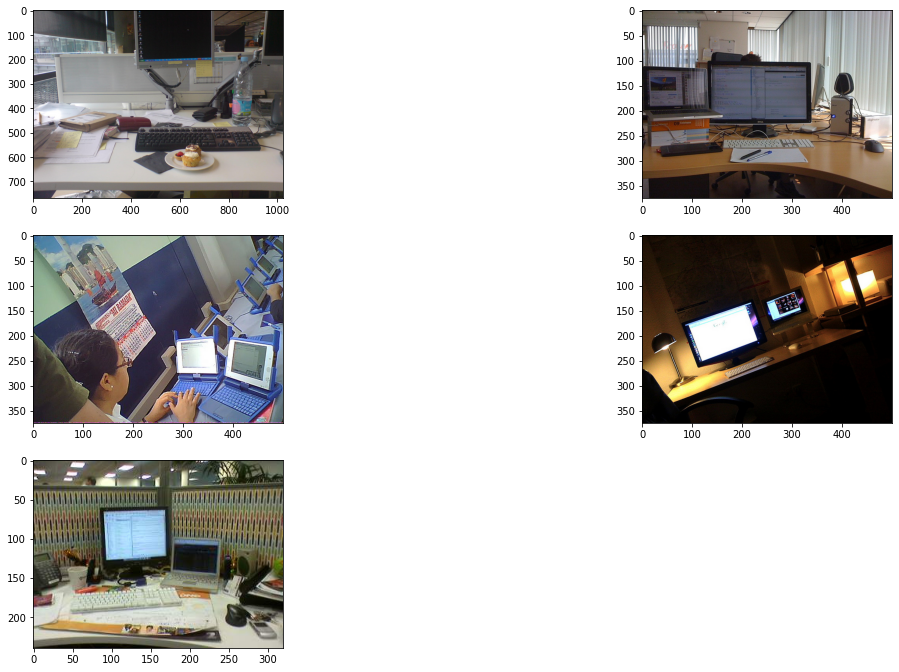

In [108]:
# !pip install urllib2
import matplotlib.pyplot as plt
from skimage import io
print(objects)

fig = plt.figure(figsize=(20, 20))
i=1
for image_link in noun_phrase_to_image_mapping[objects]:
    # f = urllib2.urlopen(image_link)
    img = io.imread(image_link)
    fig.add_subplot(5,2,i)
    plt.imshow(img)
    i+=1